In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,plot_confusion_matrix,multilabel_confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import glob

In [2]:
glob.glob('*.csv')

['Ecommerce Customers.csv']

In [3]:
df=pd.read_csv('Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [5]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
df.drop(['Email','Address'],axis=1,inplace=True)

In [7]:
df.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
df['Avatar']

0                Violet
1             DarkGreen
2                Bisque
3           SaddleBrown
4      MediumAquaMarine
             ...       
495                 Tan
496       PaleVioletRed
497            Cornsilk
498                Teal
499         DarkMagenta
Name: Avatar, Length: 500, dtype: object

In [9]:
df.drop('Avatar',axis=1,inplace=True)

In [10]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
df.isna().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [12]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

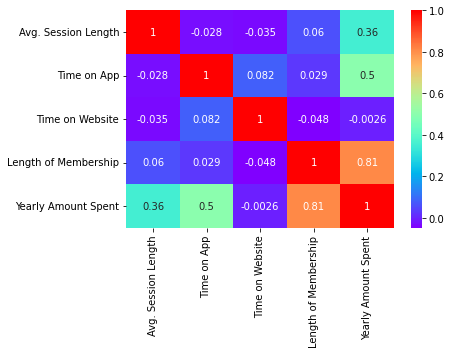

In [13]:
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

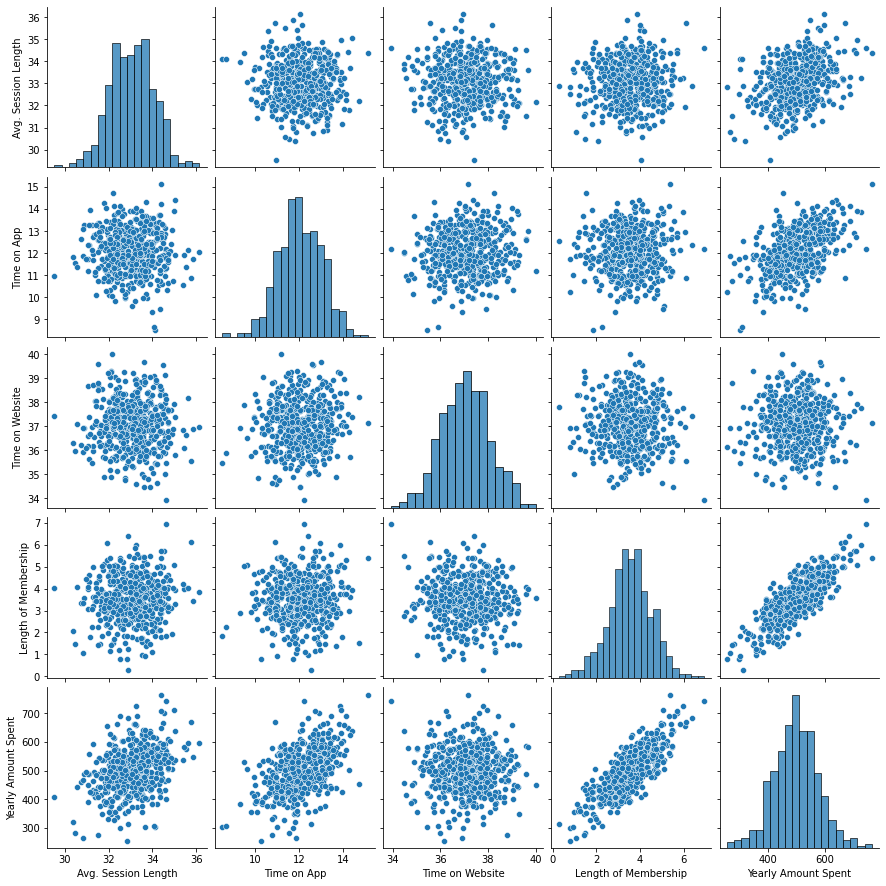

In [14]:
sns.pairplot(df)

In [15]:
df.shape

(500, 5)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [17]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<AxesSubplot:>

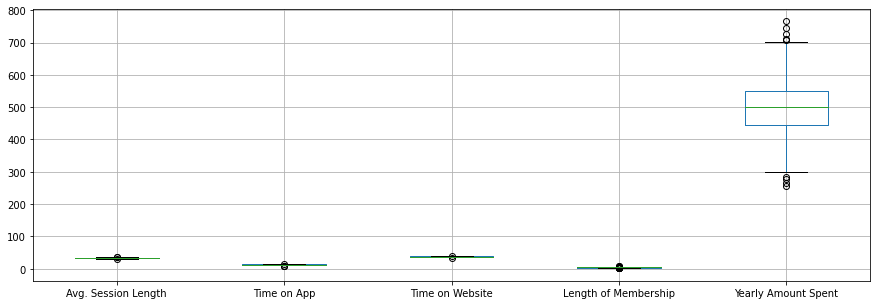

In [18]:
plt.figure(figsize=(15,5))
df.boxplot()

In [19]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

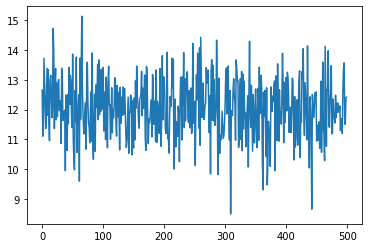

In [20]:
plt.plot(df['Time on App'])

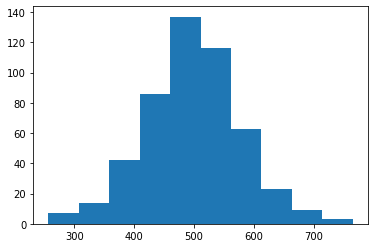

In [21]:
plt.hist(df['Yearly Amount Spent'])
# plt.hist(df['Time on App'])
plt.show()

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

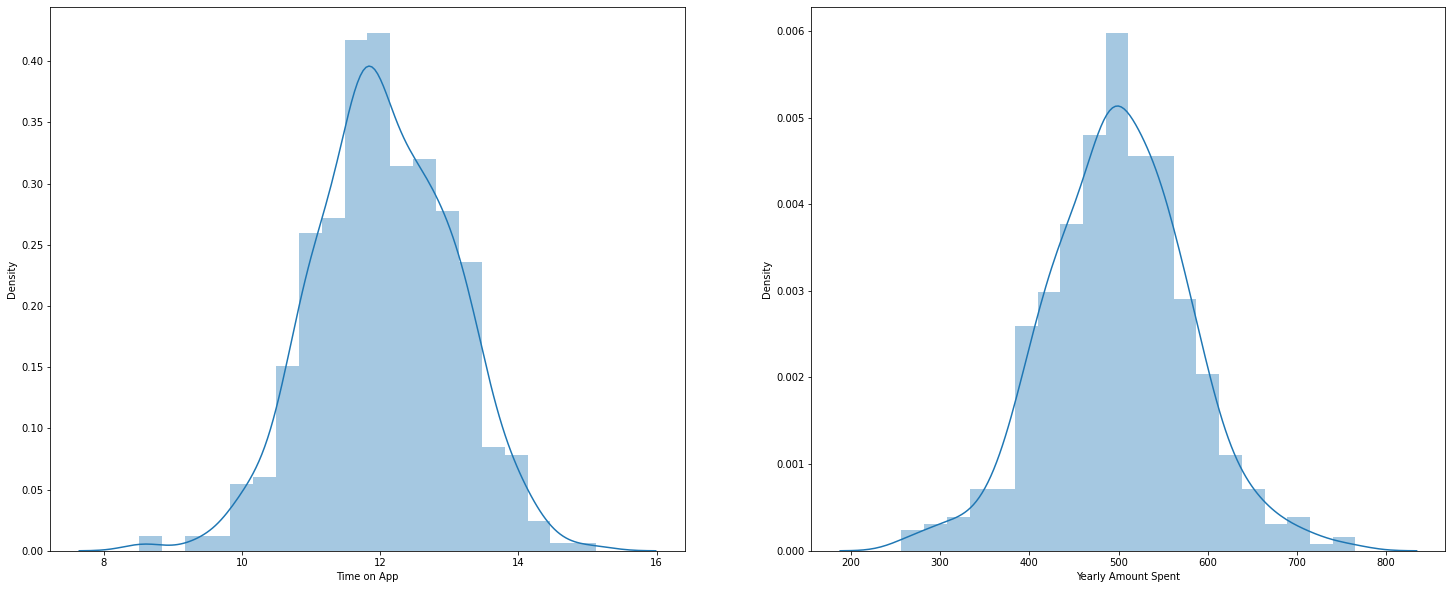

In [22]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.distplot(df['Time on App'])
plt.subplot(1,2,2)
sns.distplot(df['Yearly Amount Spent'])

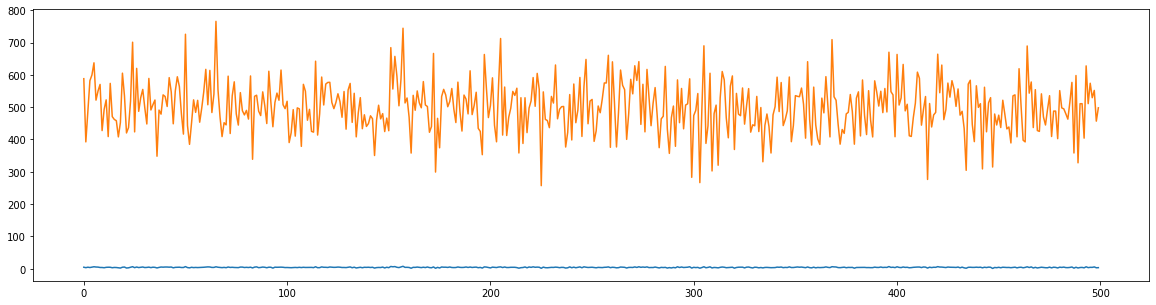

In [23]:
plt.figure(figsize=(20,5))
plt.plot(df['Length of Membership'])
plt.plot(df['Yearly Amount Spent'])

In [24]:
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [25]:
x=df.drop('Yearly Amount Spent',axis=1)
y=df['Yearly Amount Spent']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [27]:
dt_reg=DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [28]:
display("Model evaluation on testing data")
y_pred=dt_reg.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R-Squared:-",r2)

'Model evaluation on testing data'

R-Squared:- 0.8916133018336253


In [29]:
display("Model evaluation on testing data")
y_pred_train=dt_reg.predict(x_train)
r2=r2_score(y_train,y_pred_train)
print("R-Squared:-",r2)

'Model evaluation on testing data'

R-Squared:- 1.0


In [30]:
# plt.figure(figsize=(20,20))
# plot_tree(dt_reg,feature_names=x.columns,filled=True)
# plt.show()

In [31]:
x.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [32]:
imp=dt_reg.feature_importances_.round(2)
fet=x.columns
array=dict(zip(imp,fet))
array

{0.1: 'Avg. Session Length',
 0.21: 'Time on App',
 0.01: 'Time on Website',
 0.68: 'Length of Membership'}

In [33]:
# dt_reg_hyp=DecisionTreeRegressor()
# hyperparameters={"criterion":['mae','mse'],
#                 'max_depth':np.arange(2,18),
#                 'min_samples_split':np.arange(2,19),
#                 'min_samples_leaf':np.arange(2,19)}
# rscv=(dt_reg_hyp,hyperparameters,cv=5)
# rscv.fit(x_train,y_train)
# hyp=rscv.best_estimator_
# hyp

In [34]:
# dt_model=hyp
# dt_model.fit(x_train,y_train)

In [35]:
# display("Model evaluation on testing data")
# y_pred=dt_model.predict(x_test)
# r2=r2_score(y_test,y_pred)
# print("R-Squared:-",r2)

In [36]:
# display("Model evaluation on testing data")
# y_pred_train=dt_model.predict(x_train)
# r2=r2_score(y_train,y_pred_train)
# print("R-Squared:-",r2)

In [38]:
result=dt_reg.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_list=result['ccp_alphas']
ccp_alpha_list

array([0.00000000e+00, 3.75533127e-07, 1.27901367e-06, 1.58164345e-06,
       1.67585313e-06, 3.02321961e-06, 5.30314821e-06, 7.83290976e-06,
       9.35829725e-06, 1.25225159e-05, 1.37396334e-05, 1.61680845e-05,
       1.69270209e-05, 2.57168093e-05, 3.44592966e-05, 3.63353271e-05,
       6.73269447e-05, 7.50531330e-05, 8.84683183e-05, 8.88072566e-05,
       1.22418838e-04, 1.31982690e-04, 1.76432797e-04, 1.84272816e-04,
       2.01947137e-04, 2.28755832e-04, 3.28133560e-04, 4.68618810e-04,
       4.86823311e-04, 5.76416874e-04, 6.24831873e-04, 6.34907736e-04,
       6.68612178e-04, 7.61038320e-04, 8.57020658e-04, 8.87794430e-04,
       1.18324258e-03, 1.21831701e-03, 1.37531031e-03, 1.42873429e-03,
       1.46329064e-03, 2.14250986e-03, 2.16288701e-03, 2.25141029e-03,
       2.30809781e-03, 2.40639726e-03, 2.47506152e-03, 2.59790389e-03,
       2.70043138e-03, 2.74039489e-03, 2.75643515e-03, 3.04942187e-03,
       3.22729002e-03, 3.56633463e-03, 3.63059875e-03, 3.76308788e-03,
      

In [39]:
np.where(ccp_alpha_list==np.max(ccp_alpha_list))

(array([385], dtype=int64),)

In [40]:
ccp_alpha_list[97]

0.01650128821442195

In [41]:
test=[]
train=[]
for i in ccp_alpha_list:
    dt_model_alpha=DecisionTreeRegressor(random_state=12,ccp_alpha=i)
    dt_model_alpha.fit(x_train,y_train)
    test.append(dt_model_alpha.score(x_test,y_test))
    train.append(dt_model_alpha.score(x_train,y_train))
    

In [42]:
max(train)

1.0

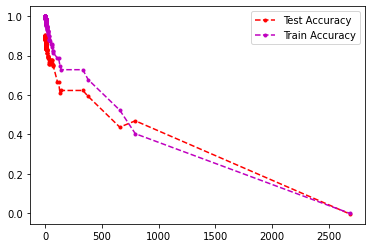

In [43]:
plt.plot(ccp_alpha_list,test,'r.--',label="Test Accuracy")
plt.plot(ccp_alpha_list,train,'m.--',label="Train Accuracy")
plt.legend()

In [44]:
np.where(test == np.max(test))

(array([232, 233], dtype=int64),)

In [45]:
test[6]

0.8991062752973942

In [46]:
ccp_alpha_list[6]

5.303148209350184e-06

In [47]:
dt_model_final=DecisionTreeRegressor(random_state=12,ccp_alpha=ccp_alpha_list[6])
dt_model_final.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=5.303148209350184e-06, random_state=12)

In [48]:
display("Model evaluation on testing data after the hyperparameter tuning")
y_pred=dt_model_final.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R-Squared:-",r2)
mae=mean_absolute_error(y_test,y_pred)
print("Mean squared error:-",mae)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared error:-",mse)

'Model evaluation on testing data after the hyperparameter tuning'

R-Squared:- 0.8991062752973942
Mean squared error:- 17.469169778358232
Mean Squared error:- 482.77589253231815


In [49]:
display("Model evaluation on training data after the hyperparameter tuning")
y_pred_train=dt_model_final.predict(x_train)
r2=r2_score(y_train,y_pred_train)
print("R-Squared:-",r2)
mae=mean_absolute_error(y_train,y_pred_train)
print("Mean squared error:-",mae)
mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared error:-",mse)

'Model evaluation on training data after the hyperparameter tuning'

R-Squared:- 0.9999999980087921
Mean squared error:- 0.0005895517562855446
Mean Squared error:- 1.3238410340459783e-05


In [50]:
import pickle 
with open ("Ecommerce.pkl","wb")as f:
    pickle.dump(dt_model_final,f)

In [51]:
columns={"columns":list(x.columns)}

In [52]:
import json 
with open ("Ecommerce_data.json",'w')as f:
    json.dump(columns,f)

In [53]:
columns

{'columns': ['Avg. Session Length',
  'Time on App',
  'Time on Website',
  'Length of Membership']}